In [11]:
import vae_EUCL
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [12]:
transform = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize((0.1307,), (0.3081,))
        ])

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET',
                              download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET',
                            download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True)


In [13]:
model = vae_EUCL.VariationalAutoencoder(latent_dims=4)

In [14]:
learning_rate = 1e-3

In [15]:
optim = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [16]:
### Training function
def train_epoch(vae, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x, _ in dataloader: 
        # Move tensor to the proper device
        # x = x.to(device)
        x_hat = vae(x)
        # Evaluate loss
        loss = ((x - x_hat)**2).sum() + vae.encoder.kl

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        print('\t partial train loss (single batch): %f' % (loss.item()))
        train_loss+=loss.item()

    return train_loss / len(dataloader.dataset)

In [17]:
### Testing function
def test_epoch(vae, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    with torch.no_grad(): # No need to track the gradients
        for x, _ in dataloader:
            # Move tensor to the proper device
            # x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

    return val_loss / len(dataloader.dataset)

In [18]:
def plot_ae_outputs(encoder,decoder,n=5):
    plt.figure(figsize=(10,4.5))
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = valset[i][0].unsqueeze(0)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()   

	 partial train loss (single batch): 49205.062500
	 partial train loss (single batch): 47859.921875
	 partial train loss (single batch): 46350.406250
	 partial train loss (single batch): 45153.226562
	 partial train loss (single batch): 44120.378906
	 partial train loss (single batch): 43322.433594
	 partial train loss (single batch): 42653.324219
	 partial train loss (single batch): 42153.082031
	 partial train loss (single batch): 41484.496094
	 partial train loss (single batch): 41000.851562
	 partial train loss (single batch): 40569.671875
	 partial train loss (single batch): 40096.734375
	 partial train loss (single batch): 39726.933594
	 partial train loss (single batch): 39405.000000
	 partial train loss (single batch): 39018.242188
	 partial train loss (single batch): 38617.222656
	 partial train loss (single batch): 38250.367188
	 partial train loss (single batch): 38016.105469
	 partial train loss (single batch): 37469.320312
	 partial train loss (single batch): 37283.714844


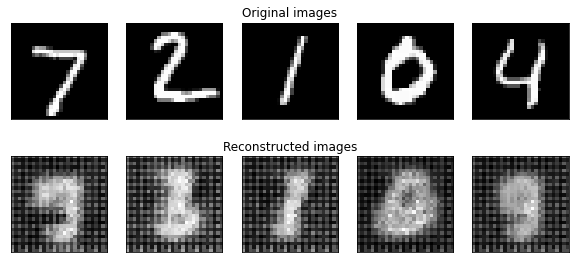

	 partial train loss (single batch): 15557.611328
	 partial train loss (single batch): 15443.435547
	 partial train loss (single batch): 15663.648438
	 partial train loss (single batch): 15373.921875
	 partial train loss (single batch): 15369.875977
	 partial train loss (single batch): 15421.853516
	 partial train loss (single batch): 15156.871094
	 partial train loss (single batch): 14822.005859
	 partial train loss (single batch): 15249.927734
	 partial train loss (single batch): 15250.435547
	 partial train loss (single batch): 15058.773438
	 partial train loss (single batch): 15297.369141
	 partial train loss (single batch): 15205.958984
	 partial train loss (single batch): 15013.918945
	 partial train loss (single batch): 15198.298828
	 partial train loss (single batch): 15073.418945
	 partial train loss (single batch): 15013.997070
	 partial train loss (single batch): 14792.084961
	 partial train loss (single batch): 14869.737305
	 partial train loss (single batch): 14532.426758


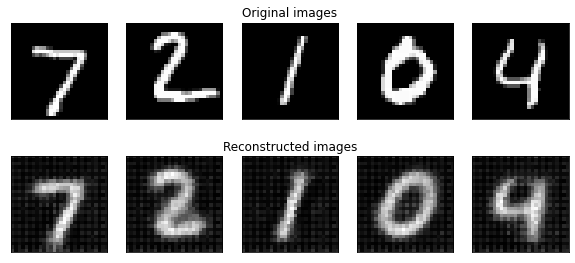

	 partial train loss (single batch): 10890.668945
	 partial train loss (single batch): 10881.809570
	 partial train loss (single batch): 10671.546875
	 partial train loss (single batch): 10713.235352
	 partial train loss (single batch): 10813.344727
	 partial train loss (single batch): 10928.206055
	 partial train loss (single batch): 10972.383789
	 partial train loss (single batch): 10704.734375
	 partial train loss (single batch): 10690.130859
	 partial train loss (single batch): 10812.499023
	 partial train loss (single batch): 10922.775391
	 partial train loss (single batch): 10854.722656
	 partial train loss (single batch): 10641.580078
	 partial train loss (single batch): 10766.485352
	 partial train loss (single batch): 10646.748047
	 partial train loss (single batch): 10812.337891
	 partial train loss (single batch): 10755.564453
	 partial train loss (single batch): 10686.699219
	 partial train loss (single batch): 10557.181641
	 partial train loss (single batch): 10420.811523


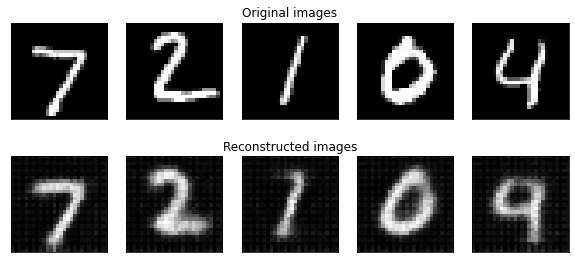

	 partial train loss (single batch): 9676.773438
	 partial train loss (single batch): 9893.187500
	 partial train loss (single batch): 10136.220703
	 partial train loss (single batch): 9694.870117
	 partial train loss (single batch): 9567.895508
	 partial train loss (single batch): 9541.484375
	 partial train loss (single batch): 9963.750000
	 partial train loss (single batch): 9676.734375
	 partial train loss (single batch): 9540.718750
	 partial train loss (single batch): 9912.989258
	 partial train loss (single batch): 9671.300781
	 partial train loss (single batch): 9877.986328
	 partial train loss (single batch): 9651.790039
	 partial train loss (single batch): 9750.245117
	 partial train loss (single batch): 9809.513672
	 partial train loss (single batch): 9483.414062
	 partial train loss (single batch): 9600.293945
	 partial train loss (single batch): 9920.910156
	 partial train loss (single batch): 10090.927734
	 partial train loss (single batch): 9344.304688
	 partial train lo

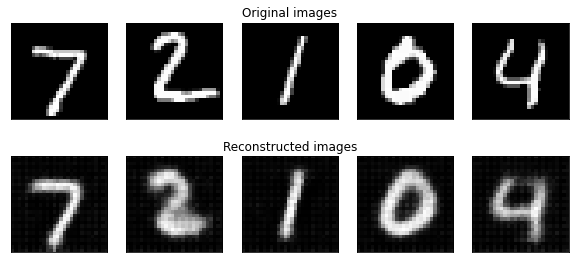

	 partial train loss (single batch): 9357.012695
	 partial train loss (single batch): 9448.693359
	 partial train loss (single batch): 9387.379883
	 partial train loss (single batch): 9174.966797
	 partial train loss (single batch): 9288.326172
	 partial train loss (single batch): 9503.886719
	 partial train loss (single batch): 9151.694336
	 partial train loss (single batch): 9610.315430
	 partial train loss (single batch): 9257.747070
	 partial train loss (single batch): 8838.384766
	 partial train loss (single batch): 9330.691406
	 partial train loss (single batch): 9109.103516
	 partial train loss (single batch): 9143.308594
	 partial train loss (single batch): 9256.540039
	 partial train loss (single batch): 9244.052734
	 partial train loss (single batch): 9166.597656
	 partial train loss (single batch): 9468.727539
	 partial train loss (single batch): 9199.726562
	 partial train loss (single batch): 9518.933594
	 partial train loss (single batch): 9487.128906
	 partial train loss

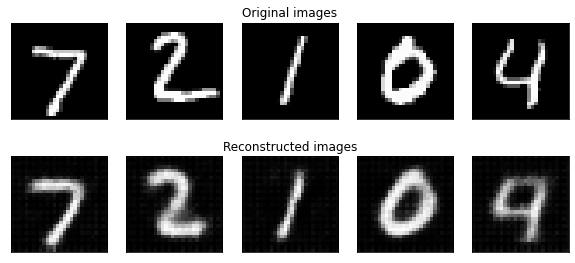

	 partial train loss (single batch): 9014.973633
	 partial train loss (single batch): 9282.443359
	 partial train loss (single batch): 8693.571289
	 partial train loss (single batch): 8887.710938
	 partial train loss (single batch): 9106.935547
	 partial train loss (single batch): 8928.685547
	 partial train loss (single batch): 9128.550781
	 partial train loss (single batch): 9129.024414
	 partial train loss (single batch): 9029.463867
	 partial train loss (single batch): 9086.744141
	 partial train loss (single batch): 9262.750000
	 partial train loss (single batch): 8800.530273
	 partial train loss (single batch): 9475.394531
	 partial train loss (single batch): 9191.116211
	 partial train loss (single batch): 8902.758789
	 partial train loss (single batch): 8844.931641
	 partial train loss (single batch): 8829.590820
	 partial train loss (single batch): 8944.566406
	 partial train loss (single batch): 9004.492188
	 partial train loss (single batch): 9381.738281
	 partial train loss

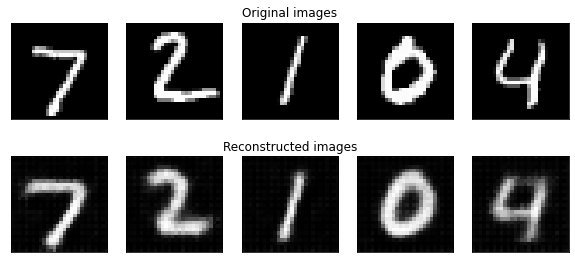

	 partial train loss (single batch): 8598.220703
	 partial train loss (single batch): 8314.850586
	 partial train loss (single batch): 8915.354492
	 partial train loss (single batch): 8779.891602
	 partial train loss (single batch): 9385.486328
	 partial train loss (single batch): 9239.583984
	 partial train loss (single batch): 8960.044922
	 partial train loss (single batch): 8924.406250
	 partial train loss (single batch): 8711.496094
	 partial train loss (single batch): 8892.804688
	 partial train loss (single batch): 8593.980469
	 partial train loss (single batch): 9131.500000
	 partial train loss (single batch): 8969.876953
	 partial train loss (single batch): 9115.958984
	 partial train loss (single batch): 9191.265625
	 partial train loss (single batch): 8855.353516
	 partial train loss (single batch): 8923.276367
	 partial train loss (single batch): 8954.660156
	 partial train loss (single batch): 8993.604492
	 partial train loss (single batch): 9090.053711
	 partial train loss

KeyboardInterrupt: 

In [19]:
num_epochs = 50

for epoch in range(num_epochs):
   train_loss = train_epoch(model, trainloader,optim)
   val_loss = test_epoch(model, valloader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
   plot_ae_outputs(model.encoder, model.decoder,n=5)


